<a href="https://colab.research.google.com/github/vishal8248862721/Car_Price_Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the requried packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the data

In [ ]:
data = pd.read_csv('/content/car_data.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#Data Preprocessing

In [ ]:
data.shape

(4340, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
data = data.drop(columns=['name'], axis=1)

In [ ]:
data.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,2017,365000,78000,CNG,Individual,Manual,First Owner


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


In [ ]:
data.duplicated().sum()

842

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(3498, 7)

In [ ]:
data.describe()

,year,selling_price,km_driven
count,3498.000000,3.498000e+03,3498.000000
mean,2012.938536,4.752773e+05,69519.497427
std,4.257100,5.134851e+05,47807.764849
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,37000.000000
50%,2013.000000,3.500000e+05,61041.500000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# Checking and removing Outliers by plotting

1.Year

In [ ]:
def box_plot_uni(data: pd.DataFrame = None, column: str = None):
    sns.boxplot(data=data, x=column)
    plt.title(f'Distribution of {column}')

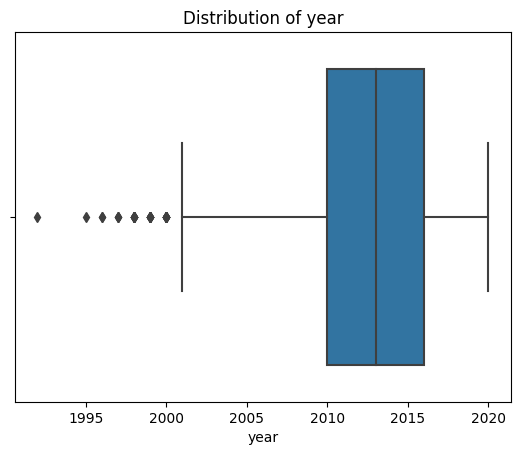

In [ ]:
box_plot_uni(data, 'year')

2.Selling price

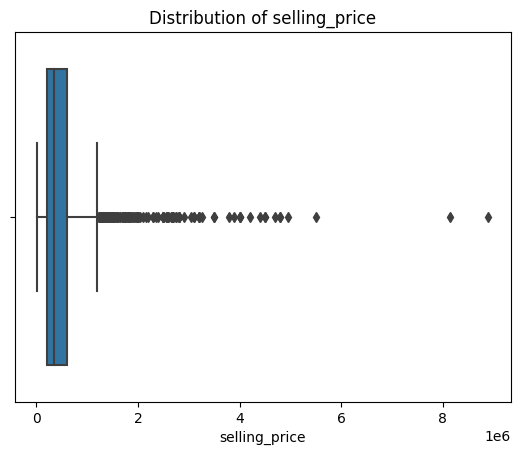

In [ ]:
box_plot_uni(data, 'selling_price')

3.km_driven

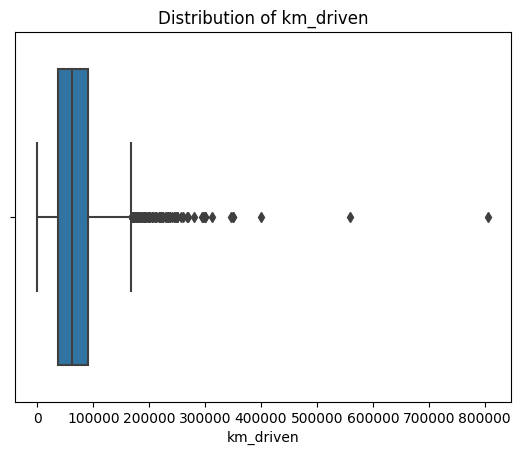

In [ ]:
box_plot_uni(data, 'km_driven')

In [ ]:
def outliers_handing(data: pd.DataFrame, column: str):
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    upper_thersold = data[column].quantile(0.75) + (1.5 * iqr)
    lower_thersold = data[column].quantile(0.25) - (1.5 * iqr)
    print(f"IQR: {iqr}\nUpper_thersold: {upper_thersold}\nLower_thresold: {lower_thersold}")

In [ ]:
data.describe()

,year,selling_price,km_driven
count,3498.000000,3.498000e+03,3498.000000
mean,2012.938536,4.752773e+05,69519.497427
std,4.257100,5.134851e+05,47807.764849
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,37000.000000
50%,2013.000000,3.500000e+05,61041.500000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
outliers_handing(data, 'year')

IQR: 6.0
Upper_thersold: 2025.0
Lower_thresold: 2001.0


In [ ]:
iqr = data['year'].quantile(0.75) - data['year'].quantile(0.25)
upper_thersold = data['year'].quantile(0.75) + (1.5 * iqr)
lower_thersold = data['year'].quantile(0.25) - (1.5 * iqr)
data['year'] = data['year'].clip(lower_thersold, upper_thersold)

In [ ]:
data.describe()

,year,selling_price,km_driven
count,3498.000000,3.498000e+03,3498.000000
mean,2012.965409,4.752773e+05,69519.497427
std,4.169171,5.134851e+05,47807.764849
min,2001.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,37000.000000
50%,2013.000000,3.500000e+05,61041.500000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


#After Outlier removal

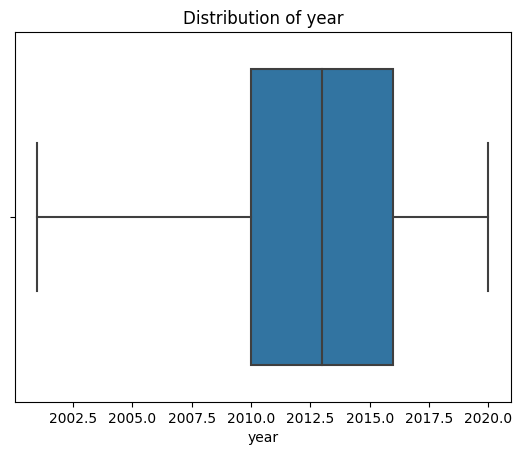

In [ ]:
box_plot_uni(data, 'year')

In [ ]:
data.describe()

,year,selling_price,km_driven
count,3498.000000,3.498000e+03,3498.000000
mean,2012.965409,4.752773e+05,69519.497427
std,4.169171,5.134851e+05,47807.764849
min,2001.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,37000.000000
50%,2013.000000,3.500000e+05,61041.500000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
outliers_handing(data, 'selling_price')

IQR: 400000.0
Upper_thersold: 1200000.0
Lower_thresold: -400000.0


In [ ]:
iqr = data['selling_price'].quantile(0.75) - data['selling_price'].quantile(0.25)
upper_thersold = data['selling_price'].quantile(0.75) + (1.5 * iqr)
lower_thersold = data['selling_price'].quantile(0.25) - (1.5 * iqr)
data['selling_price'] = data['selling_price'].clip(lower_thersold, upper_thersold)

In [ ]:
data.describe()

,year,selling_price,km_driven
count,3498.000000,3.498000e+03,3498.000000
mean,2012.965409,4.307542e+05,69519.497427
std,4.169171,3.023836e+05,47807.764849
min,2001.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,37000.000000
50%,2013.000000,3.500000e+05,61041.500000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,1.200000e+06,806599.000000


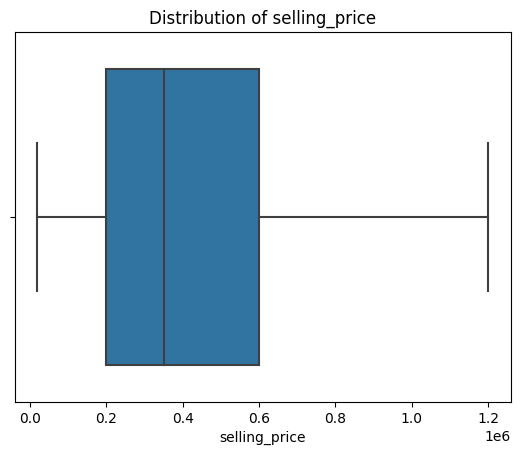

In [ ]:
box_plot_uni(data, 'selling_price')

In [ ]:
data.describe()

,year,selling_price,km_driven
count,3498.000000,3.498000e+03,3498.000000
mean,2012.965409,4.307542e+05,69519.497427
std,4.169171,3.023836e+05,47807.764849
min,2001.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,37000.000000
50%,2013.000000,3.500000e+05,61041.500000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,1.200000e+06,806599.000000


In [ ]:
outliers_handing(data, 'km_driven')

IQR: 53000.0
Upper_thersold: 169500.0
Lower_thresold: -42500.0


In [ ]:
iqr = data['km_driven'].quantile(0.75) - data['km_driven'].quantile(0.25)
upper_thersold = data['km_driven'].quantile(0.75) + (1.5 * iqr)
lower_thersold = data['km_driven'].quantile(0.25) - (1.5 * iqr)
data['km_driven'] = data['km_driven'].clip(lower_thersold, upper_thersold)

In [ ]:
data.describe()

,year,selling_price,km_driven
count,3498.000000,3.498000e+03,3498.000000
mean,2012.965409,4.307542e+05,67740.209262
std,4.169171,3.023836e+05,40421.639451
min,2001.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,37000.000000
50%,2013.000000,3.500000e+05,61041.500000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,1.200000e+06,169500.000000


##Exploratory Data Analysis

**Univariate Analysis**



1.   Categorical varaibles



In [ ]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
def value_counts(column: str = None):
    print(f'{data[column].value_counts()}')

In [ ]:
def count_plot_uni(data: pd.DataFrame = None, column: str = None, hue: str = None):
    sns.countplot(data=data, x=column, hue=hue)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
value_counts('fuel')

Diesel      1762
Petrol      1676
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64


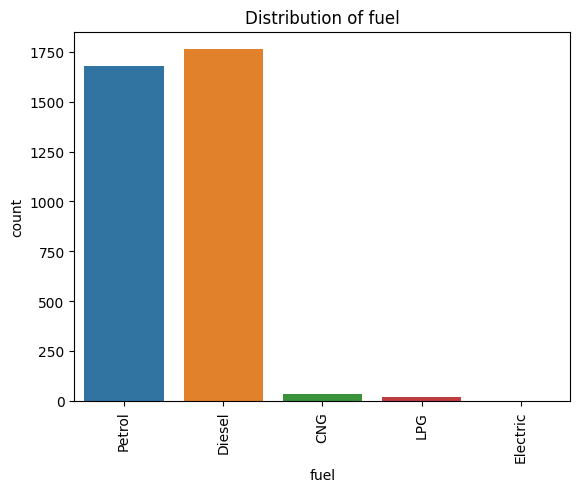

In [ ]:
count_plot_uni(data=data, column='fuel')


In [ ]:
value_counts('seller_type')

Individual          2753
Dealer               712
Trustmark Dealer      33
Name: seller_type, dtype: int64


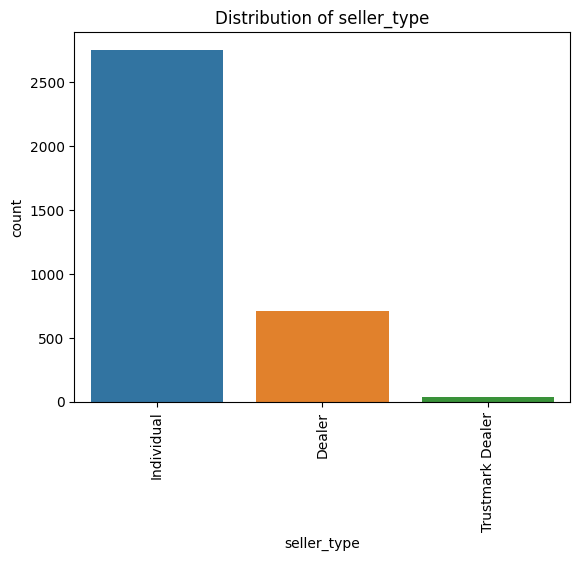

In [ ]:
count_plot_uni(data=data, column='seller_type')

In [ ]:
value_counts('transmission')

Manual       3187
Automatic     311
Name: transmission, dtype: int64


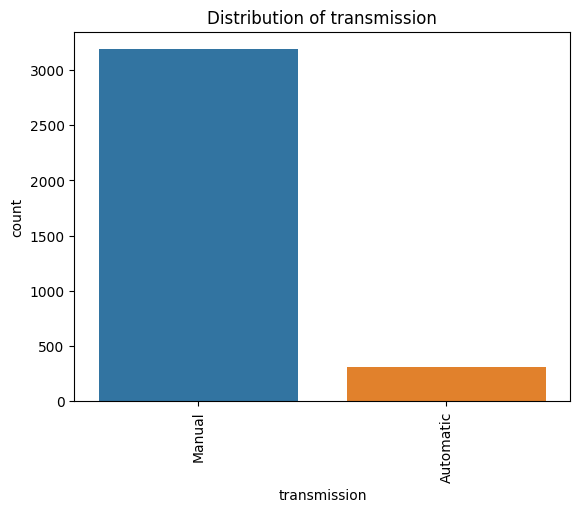

In [ ]:
count_plot_uni(data=data, column='transmission')

In [ ]:
value_counts('owner')

First Owner             2157
Second Owner             964
Third Owner              285
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64


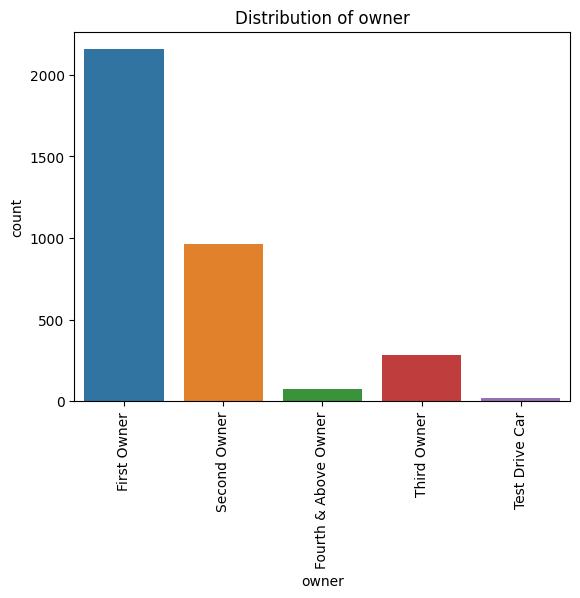

In [ ]:
count_plot_uni(data=data, column='owner')



2.   Numercial variable




In [ ]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
def dis_plot_uni(data: pd.DataFrame = None, column: str = None, bins: int = None):
    sns.displot(x=column, kde=True, data=data, bins=bins)
    plt.title(f'Distribution of {column}')
    plt.show()

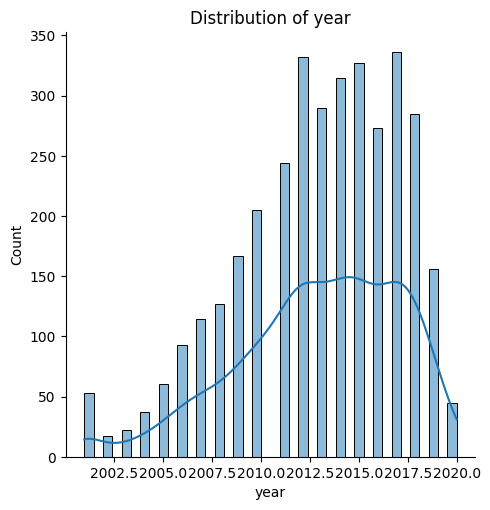

In [ ]:
dis_plot_uni(data, 'year', bins=40)

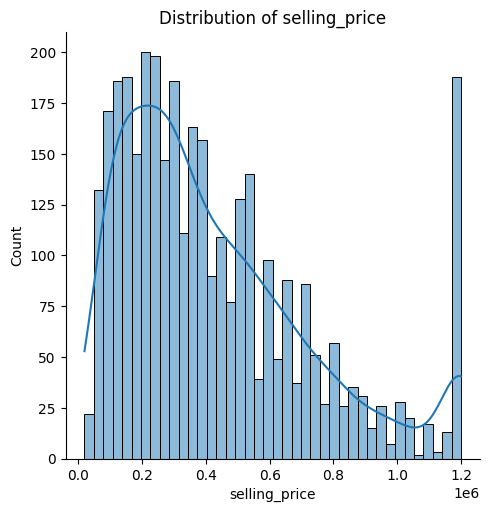

In [ ]:
dis_plot_uni(data, 'selling_price', bins=40)

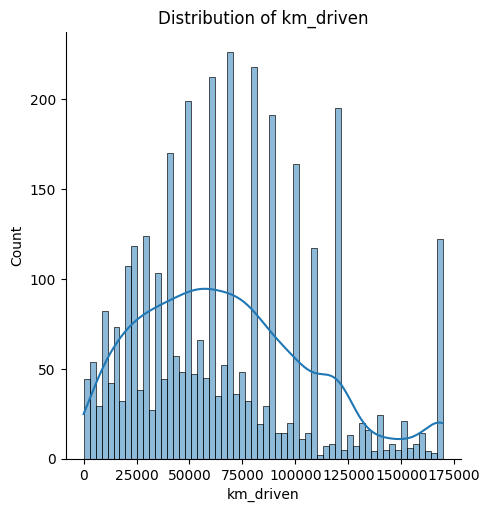

In [ ]:
dis_plot_uni(data, 'km_driven', bins=60)

##Bivariate Analysis



1.   Categorical Analysis



In [ ]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
def count_plot_bi(data: pd.DataFrame = None, x_column: str = None, y_column: str = None):
    plt.figure(figsize=(15,5))
    sns.countplot(data=data, x=x_column, hue=y_column)
    plt.title(f'Distribution of {x_column}')
    plt.xticks(rotation=90)
    plt.show()

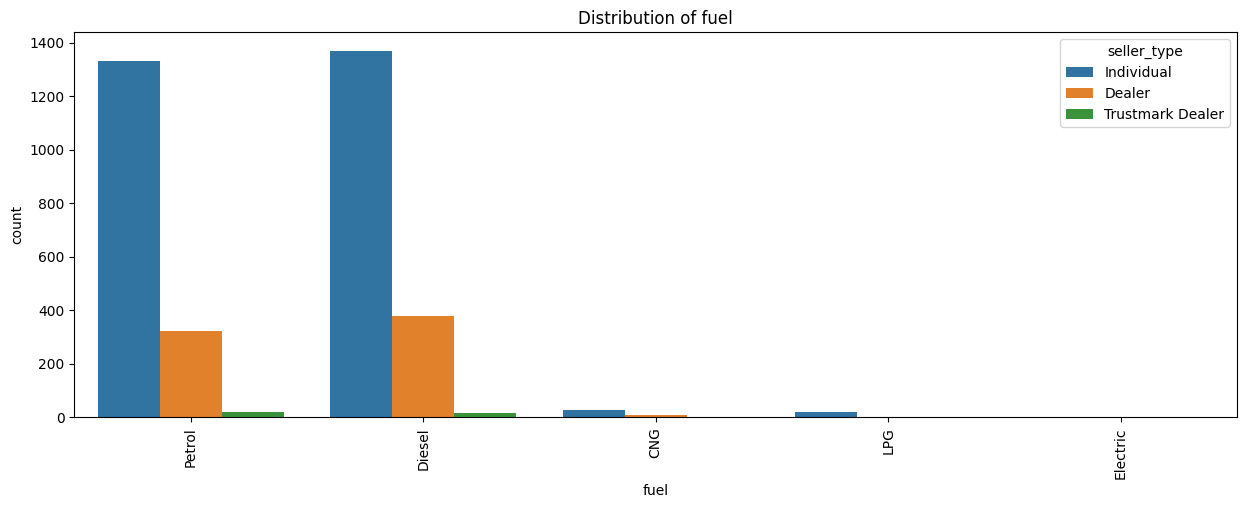

In [ ]:
count_plot_bi(data, 'fuel', 'seller_type')

In [ ]:
def bar_plot_bi(data: pd.DataFrame = None, x_column: str = None, y_column: str = None, hue: str = None):
    sns.barplot(data=data, x=x_column, y=y_column, hue=hue)
    plt.title(f'Distribution of {x_column}')
    plt.xticks(rotation=90)
    plt.show()

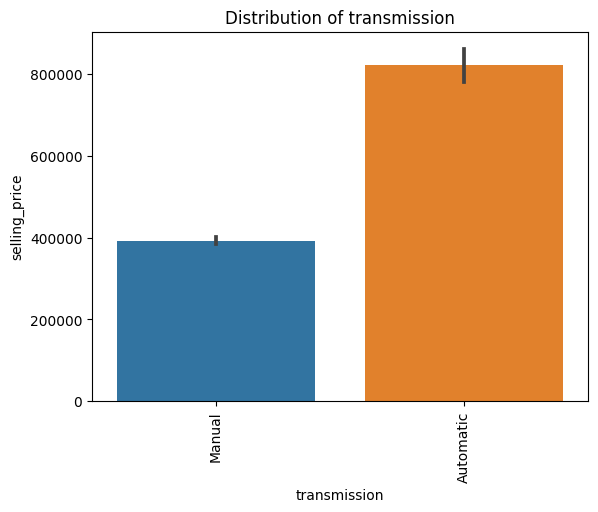

In [ ]:
bar_plot_bi(data, 'transmission', 'selling_price')

In [ ]:
def pivot_table(index: str = None, column: str = None, values: str = None):
    return pd.DataFrame(data.pivot_table(index=index, columns=column, values=values))

In [ ]:
pivot_table('seller_type', 'fuel', 'selling_price')

fuel,CNG,Diesel,Electric,LPG,Petrol
seller_type,,,,,
Dealer,311444.333333,658580.867374,310000.0,240000.000000,440092.533951
Individual,260857.071429,505649.125456,NaN,168571.380952,288200.488372
Trustmark Dealer,NaN,818214.285714,NaN,NaN,675526.315789



2.  Numerical Analysis



In [ ]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
def scatter_plot_bi(data: pd.DataFrame = None, x_column: str = None, y_column: str = None, hue: str = None):
    plt.figure(figsize=(15,5))
    plt.title(f'Distribution of {x_column}')
    sns.scatterplot(data=data, x=x_column, y=y_column, hue=hue)


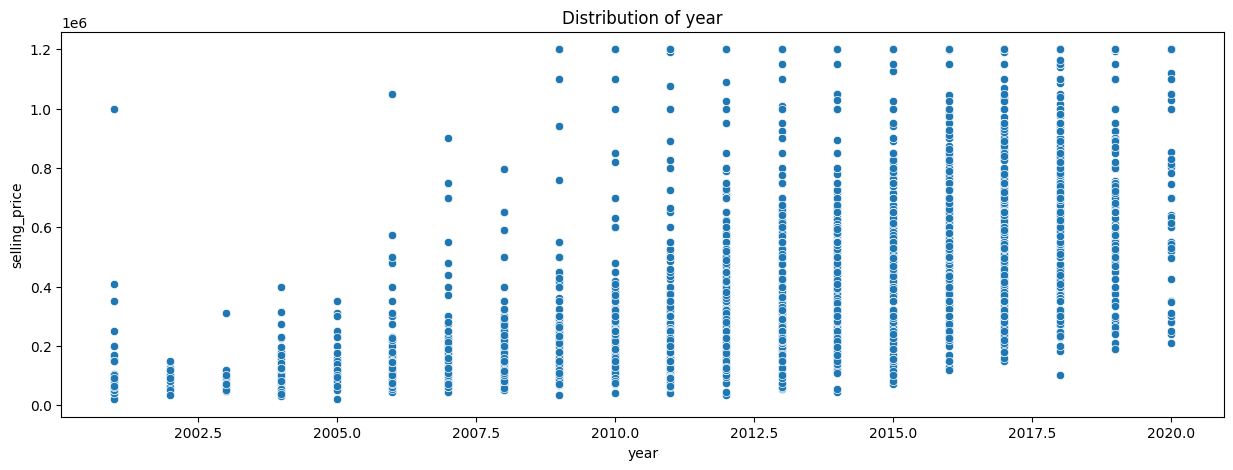

In [ ]:
scatter_plot_bi(data, 'year', 'selling_price')

In [ ]:
def box_plot_bi(data: pd.DataFrame = None, x_column: str = None, y_column: str = None, hue: str = None):
    sns.boxplot(data=data, x=x_column, y=y_column, hue=hue)
    plt.title(f'Distribution of {y_column} for {x_column}')

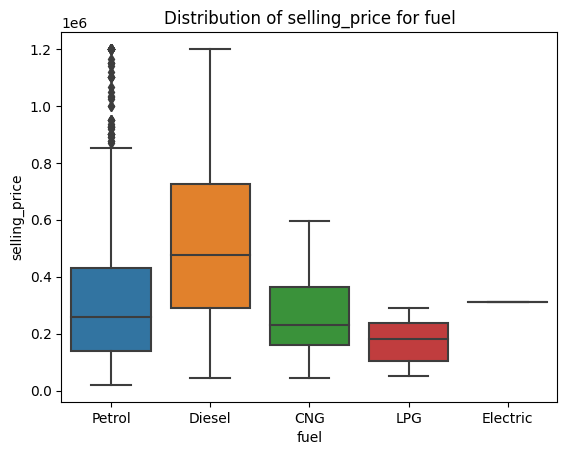

In [ ]:
box_plot_bi(data, 'fuel',"selling_price")

#Encoding the categorical Features into Numerical

In [ ]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
def value_counts(data: pd.DataFrame = None,column: str = None):
    print(data[column].value_counts().sort_values(ascending=True))

In [ ]:
value_counts(data, 'fuel')

Electric       1
LPG           22
CNG           37
Petrol      1676
Diesel      1762
Name: fuel, dtype: int64


In [ ]:
data['fuel'] = data['fuel'].map({"Petrol":2,"Diesel":1,"CNG":3,"LPG":3,"Electric":3})

In [ ]:
data['fuel'].value_counts()

1    1762
2    1676
3      60
Name: fuel, dtype: int64

In [ ]:
value_counts(data, 'seller_type')

Trustmark Dealer      33
Dealer               712
Individual          2753
Name: seller_type, dtype: int64


In [ ]:
data['seller_type'] = data['seller_type'].map({"Individual":1,"Dealer":2,"Trustmark Dealer":3})

In [ ]:
value_counts(data, 'transmission')

Automatic     311
Manual       3187
Name: transmission, dtype: int64


In [ ]:
data["transmission"] = data["transmission"].map({"Manual":1,"Automatic":2})

In [ ]:
value_counts(data, 'owner')

Test Drive Car            17
Fourth & Above Owner      75
Third Owner              285
Second Owner             964
First Owner             2157
Name: owner, dtype: int64


In [ ]:
data["owner"] = data["owner"].map({"First Owner":1,"Second Owner":2,"Third Owner":3,"Fourth & Above Owner":3,"Test Drive Car":3})

In [ ]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,2,1,1,1
1,2007,135000,50000,2,1,1,1
2,2012,600000,100000,1,1,1,1
3,2017,250000,46000,2,1,1,1
4,2014,450000,141000,1,1,1,2


#Save the Encoded Data

In [ ]:
data.to_csv('car_encoded.csv')

#Split the data as Features and Target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(columns=['selling_price'], axis=1)
y = data['selling_price']

In [ ]:
X

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,2,1,1,1
1,2007,50000,2,1,1,1
2,2012,100000,1,1,1,1
3,2017,46000,2,1,1,1
4,2014,141000,1,1,1,2
...,...,...,...,...,...,...
4334,2012,169500,1,1,1,1
4335,2014,80000,1,1,1,2
4337,2009,83000,2,1,1,2
4338,2016,90000,1,1,1,1


In [ ]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4334    600000
4335    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 3498, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Import required libraries for Data Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

#Linear Regression

In [ ]:
lr = LinearRegression()
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)
r2, mse

(0.5736427864640656, 152198.5699473302)

#Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=6, max_features='sqrt')
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)
r2, mse

(0.646113202886741, 133277.2678213505)

#Gradient Boosting

In [ ]:
gb = GradientBoostingRegressor()
gb = gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)
r2, mse

(0.6417685480151032, 130884.33844524456)

#XG Boosting

In [ ]:
xg = XGBRegressor(n_estimators=350,
                learning_rate=0.01,
                max_depth=4, reg_lambda=0.2)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)
r2, mse

(0.6463531534460194, 131693.98728794642)

# Features selection

In [ ]:
fim = pd.Series(xg.feature_importances_, index= X_train.columns)
print(fim.sort_values(ascending=False))

year            0.389401
transmission    0.307448
fuel            0.206646
seller_type     0.045796
km_driven       0.033212
owner           0.017498
dtype: float32


#Import Libraries to save data

In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(xg, file)

In [ ]:
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
prediction = model.predict(X_test)
print(prediction[0])

408735.72


In [ ]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,2,1,1,1
1,2007,135000,50000,2,1,1,1
2,2012,600000,100000,1,1,1,1
3,2017,250000,46000,2,1,1,1
4,2014,450000,141000,1,1,1,2


#Model predcition

In [ ]:
import numpy as np

In [ ]:
user_input = (2012,100000, 1, 1, 1, 1)
input_data_as_numpy_array = np.asarray(user_input)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction[0])

359707.53
